In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# Exploratory Data Analysis (EDA)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [12]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [47]:
# To check null values in each columns in % 
df.isnull().mean() * 100

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

In [48]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes' : 1 , 'No' : 0})
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

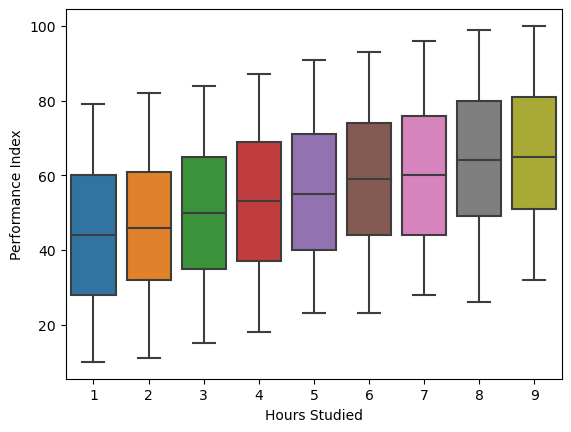

In [17]:
# df.plot(kind="scatter", x="Hours Studied", y="Performance Index")
sns.boxplot(data=df, x="Hours Studied", y="Performance Index")

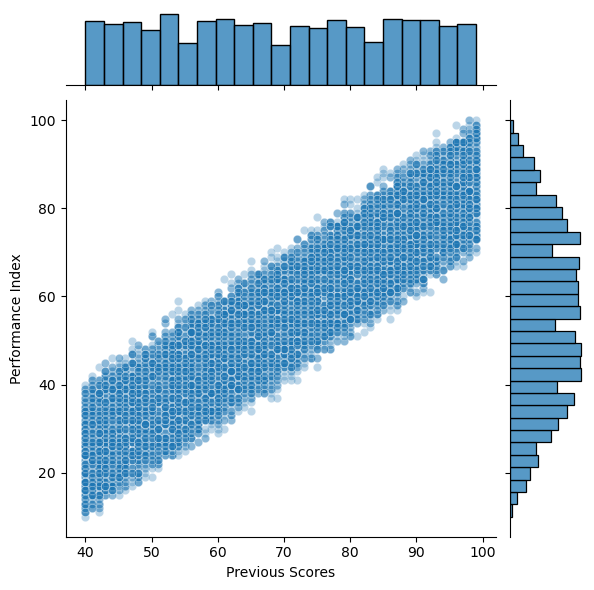

In [22]:
sns.jointplot(data=df, x="Previous Scores", y="Performance Index", alpha=0.3)

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

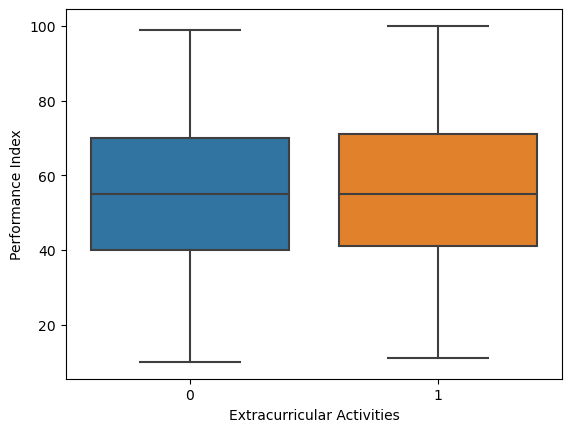

In [78]:
sns.boxplot(data=df, x = "Extracurricular Activities", y = "Performance Index")

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

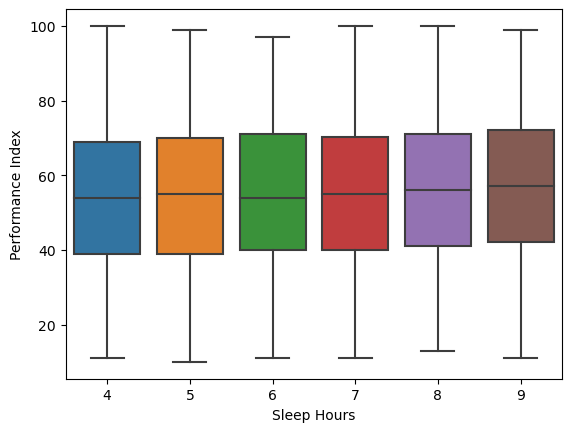

In [25]:
sns.boxplot(data=df, x="Sleep Hours", y="Performance Index")

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

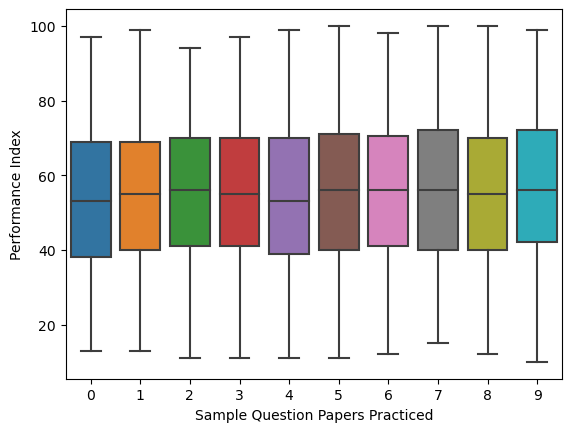

In [28]:
sns.boxplot(data=df, x="Sample Question Papers Practiced", y="Performance Index")

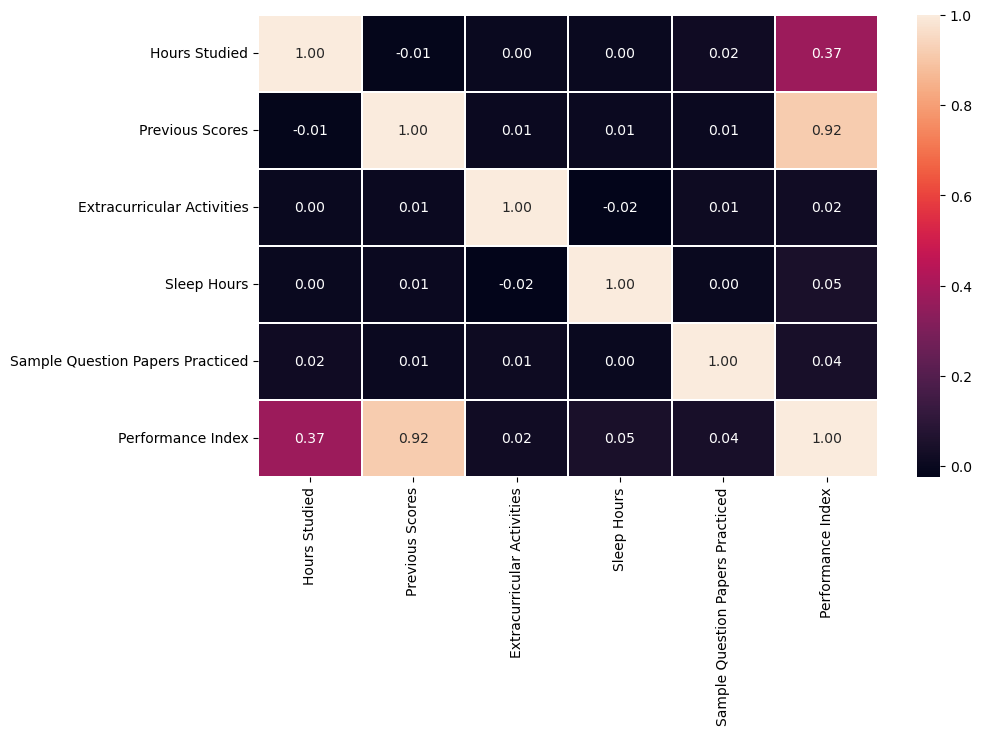

In [80]:
plt.figure(figsize = (10,6))
sns.heatmap(df.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

C:\Users\konte\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


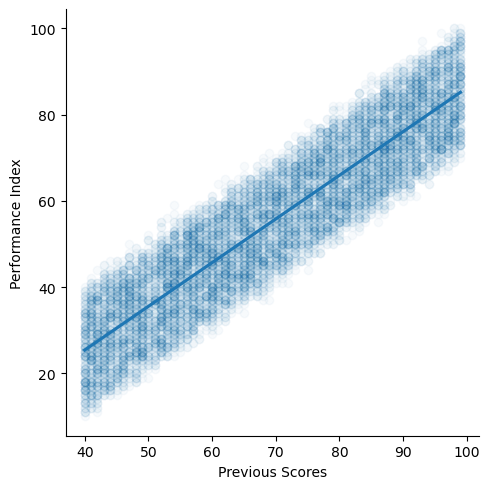

In [41]:
sns.lmplot(data=df, x="Previous Scores", y="Performance Index", scatter_kws={'alpha':0.03})

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
# Getting all the coefficient for each columns
lm.coef_

array([2.85895223, 1.01551979, 0.58171285, 0.47967676, 0.19039416])

In [54]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coef"])
print(cdf)

                                      Coef
Hours Studied                     2.858952
Previous Scores                   1.015520
Extracurricular Activities        0.581713
Sleep Hours                       0.479677
Sample Question Papers Practiced  0.190394


In [59]:
# Getting the intercept value of the regression plane
lm.intercept_

-33.836543807141744

In [60]:
predictions = lm.predict(X_test)

Text(0.5, 0, 'Predictions')

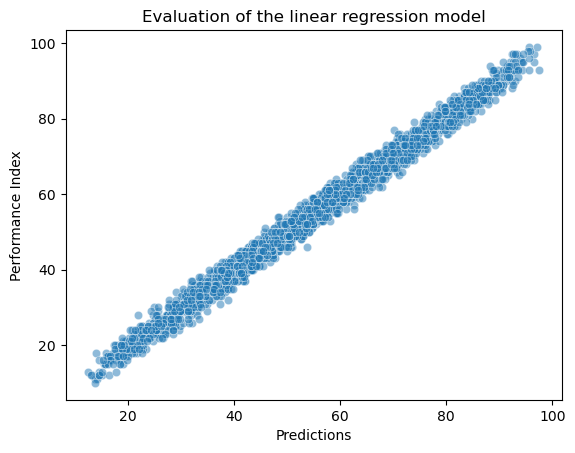

In [67]:
sns.scatterplot(x=predictions, y=y_test, alpha=0.5)
plt.title("Evaluation of the linear regression model")
plt.xlabel("Predictions")

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [76]:
print("r2 Score: ", r2_score(y_test, predictions)*100)
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

r2 Score:  98.90110607021137
Mean Absolute Error:  1.6090437564045221
Mean Squared Error:  4.066563824092681
RMSE:  2.0165722957763457
